In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from nets import *
from cfgs import *
from data import *
from trainer import *

In [2]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 1.0, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
X_tst[:,0] = X_tst[:,0] * 12.0 + 4.0
X_tst[:,1] = X_tst[:,1] * 3.0 + 4.0
print(X_tst.shape)

cfg = additive_1x2_uniform_416_47_config.cfg
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 2)


In [3]:
Net = additive_net.Net
Generator = uniform_416_47_generator.Generator
Trainer = trainer.Trainer

In [4]:
net = Net(cfg, "test")
generator = Generator(cfg, 'test', X_tst)
m = Trainer(cfg, "test", net)
m.test(generator)

INFO:tensorflow:Restoring parameters from experiments/additive_1x2_uniform_416_47/model-400000


2019-01-30 00:43:07,517:INFO:Restoring parameters from experiments/additive_1x2_uniform_416_47/model-400000
2019-01-30 00:43:10,831:INFO:TEST BATCH-0: t = 3.2809, Net_Loss: -7.976263, Revenue: 7.976263
2019-01-30 00:43:10,836:INFO:TEST BATCH-1: t = 3.2827, Net_Loss: -7.976263, Revenue: 7.976263
2019-01-30 00:43:10,840:INFO:TEST BATCH-2: t = 3.2845, Net_Loss: -7.976263, Revenue: 7.976263
2019-01-30 00:43:10,844:INFO:TEST BATCH-3: t = 3.2864, Net_Loss: -8.036236, Revenue: 8.036236
2019-01-30 00:43:10,848:INFO:TEST BATCH-4: t = 3.2883, Net_Loss: -8.036236, Revenue: 8.036236
2019-01-30 00:43:10,851:INFO:TEST BATCH-5: t = 3.2901, Net_Loss: -8.076189, Revenue: 8.076189
2019-01-30 00:43:10,855:INFO:TEST BATCH-6: t = 3.2920, Net_Loss: -8.076189, Revenue: 8.076189
2019-01-30 00:43:10,859:INFO:TEST BATCH-7: t = 3.2938, Net_Loss: -8.116145, Revenue: 8.116145
2019-01-30 00:43:10,863:INFO:TEST BATCH-8: t = 3.2957, Net_Loss: -8.116145, Revenue: 8.116145
2019-01-30 00:43:10,867:INFO:TEST BATCH-9: t =

2019-01-30 00:43:11,167:INFO:TEST BATCH-86: t = 3.4860, Net_Loss: -9.674373, Revenue: 9.674373
2019-01-30 00:43:11,171:INFO:TEST BATCH-87: t = 3.4886, Net_Loss: -9.714327, Revenue: 9.714327
2019-01-30 00:43:11,176:INFO:TEST BATCH-88: t = 3.4909, Net_Loss: -9.714327, Revenue: 9.714327
2019-01-30 00:43:11,181:INFO:TEST BATCH-89: t = 3.4944, Net_Loss: -9.754282, Revenue: 9.754282
2019-01-30 00:43:11,184:INFO:TEST BATCH-90: t = 3.4969, Net_Loss: -9.794236, Revenue: 9.794236
2019-01-30 00:43:11,188:INFO:TEST BATCH-91: t = 3.5000, Net_Loss: -9.794236, Revenue: 9.794236
2019-01-30 00:43:11,193:INFO:TEST BATCH-92: t = 3.5037, Net_Loss: -9.834191, Revenue: 9.834191
2019-01-30 00:43:11,196:INFO:TEST BATCH-93: t = 3.5055, Net_Loss: -9.834191, Revenue: 9.834191
2019-01-30 00:43:11,200:INFO:TEST BATCH-94: t = 3.5078, Net_Loss: -9.874146, Revenue: 9.874146
2019-01-30 00:43:11,206:INFO:TEST BATCH-95: t = 3.5108, Net_Loss: -9.874146, Revenue: 9.874146
2019-01-30 00:43:11,208:INFO:TEST BATCH-96: t = 3.

2019-01-30 00:43:11,491:INFO:TEST BATCH-171: t = 3.7106, Net_Loss: -10.713193, Revenue: 10.713193
2019-01-30 00:43:11,494:INFO:TEST BATCH-172: t = 3.7124, Net_Loss: -10.713193, Revenue: 10.713193
2019-01-30 00:43:11,498:INFO:TEST BATCH-173: t = 3.7154, Net_Loss: -10.713193, Revenue: 10.713193
2019-01-30 00:43:11,502:INFO:TEST BATCH-174: t = 3.7182, Net_Loss: -10.713193, Revenue: 10.713193
2019-01-30 00:43:11,505:INFO:TEST BATCH-175: t = 3.7211, Net_Loss: -10.713193, Revenue: 10.713193
2019-01-30 00:43:11,510:INFO:TEST BATCH-176: t = 3.7243, Net_Loss: -10.713193, Revenue: 10.713193
2019-01-30 00:43:11,514:INFO:TEST BATCH-177: t = 3.7271, Net_Loss: -10.713193, Revenue: 10.713193
2019-01-30 00:43:11,517:INFO:TEST BATCH-178: t = 3.7289, Net_Loss: -10.713193, Revenue: 10.713193
2019-01-30 00:43:11,522:INFO:TEST BATCH-179: t = 3.7315, Net_Loss: -10.713193, Revenue: 10.713193
2019-01-30 00:43:11,525:INFO:TEST BATCH-180: t = 3.7342, Net_Loss: -10.713193, Revenue: 10.713193
2019-01-30 00:43:11,

In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)

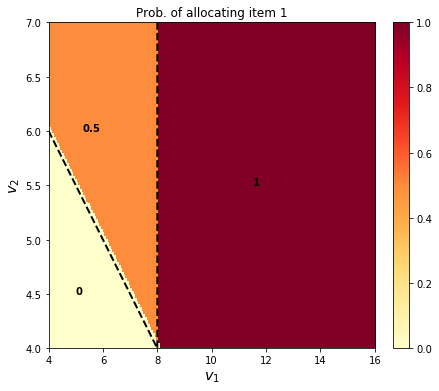

In [6]:
points = [(4, 6), (8, 4), (8, 7)]
x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))
        
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 0], extent=[4,16,4,7], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd', aspect=4)
                    
plt.text(5, 4.5, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(5.25, 6, s='0.5', color='black', fontsize='10', fontweight='bold')
plt.text(11.5, 5.5, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 1')
plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

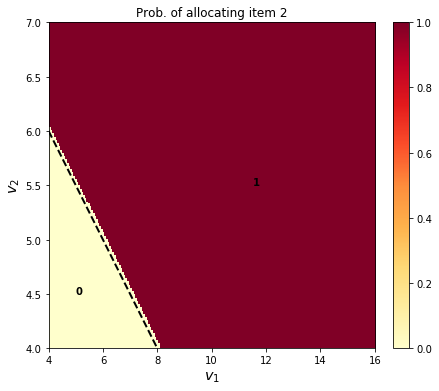

In [7]:
points = [(4, 6), (8, 4)]

x = list(map(lambda x: x[0], points))
y = list(map(lambda x: x[1], points))
        
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize=(8,6))

plt.plot(x, y, linewidth = 2, linestyle = '--', c='black')
img = ax.imshow(alloc[::-1, :, 1], extent=[4,16,4,7], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd', aspect=4)
                    
plt.text(5, 4.5, s='0', color='black', fontsize='10', fontweight='bold')
plt.text(11.5, 5.5, s='1', color='black', fontsize='10', fontweight='bold')

ax.set_xlabel('$v_1$')
ax.set_ylabel('$v_2$')
plt.title('Prob. of allocating item 2')
plt.colorbar(img, fraction=0.046, pad=0.04)
if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)